<a href="https://colab.research.google.com/github/cgonzalez022407-art/Proyecto_Iintegrador_Supervisado/blob/main/notebooks/clasificacion/01_modelos_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science - ICARO
_________________________________
Clase: 13
Tema: Proyecto integrador - Supervisado
_________________________________


## Objetivo:
- Aplicar un flujo de trabajo de Machine Learning de principio a fin para resolver un problema de clasificación y uno de regresión, utilizando el dataset "Wine Quality".

---

## Índice

1. [Imports y Configuración Inicial](#imports)
2. [Carga y Preparación de Datos](#carga)
3. [Análisis Exploratorio de Datos (EDA)](#eda)
4. [**Tarea 1: Clasificación (Predecir Tipo de Vino)**](#clasificacion)
    - 4.1. [Preparación de Datos para Clasificación](#prep_clasificacion)
    - 4.2. [Modelos Base de Clasificación](#modelos_base_clasificacion)
    - 4.3. [**(A COMPLETAR) Modelos Avanzados y Optimización**](#completar_clasificacion)
    - 4.4. [**(A COMPLETAR) Tabla de Resultados y Conclusión de Clasificación**](#conclusion_clasificacion)
5. [**Tarea 2: Regresión (Predecir Calidad del Vino)**](#regresion)
    - 5.1. [Preparación de Datos para Regresión](#prep_regresion)
    - 5.2. [Modelo Base de Regresión](#modelo_base_regresion)
    - 5.3. [**(A COMPLETAR) Modelos Avanzados y Optimización**](#completar_regresion)
    - 5.4. [**(A COMPLETAR) Tabla de Resultados y Conclusión de Regresión**](#conclusion_regresion)
6. [**(A COMPLETAR) Conclusiones Finales del Proyecto**](#final)

---


<a name="imports"></a>
## 1. Imports y Configuración Inicial
En esta primera celda, importaremos todas las librerías que necesitaremos para nuestro análisis.

In [ ]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos y Preprocesamiento
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor

# Métricas de evaluación
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                             mean_absolute_error, mean_squared_error, r2_score)


<a name="carga"></a>
## 2. Carga y Preparación de Datos
Vamos a cargar los dos datasets (vino tinto y vino blanco), añadiremos una columna para identificar el tipo de vino y luego los uniremos en un único DataFrame.

In [ ]:
# URLs de los datasets
url_red = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_white = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

# Carga de los dataframes
df_red = pd.read_csv(url_red, sep=';')
df_white = pd.read_csv(url_white, sep=';')

# Creación de la columna 'type'
df_red['type'] = 'red'
df_white['type'] = 'white'

# Unión de los dataframes
df = pd.concat([df_red, df_white], axis=0)

# Reseteamos el índice
df.reset_index(drop=True, inplace=True)

print("Forma del dataset combinado:", df.shape)
print("\nPrimeras 5 filas:")
display(df.head())

Forma del dataset combinado: (6497, 13)

Primeras 5 filas:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


<a name="eda"></a>
## 3. Análisis Exploratorio de Datos (EDA)
Es fundamental entender nuestros datos antes de modelar. Realizaremos un análisis descriptivo y algunas visualizaciones clave.

In [ ]:
# Información general y chequeo de nulos
print("Información del DataFrame:")
df.info()

print("\nEstadísticas Descriptivas:")
display(df.describe())

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB

Estadísticas Descriptivas:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


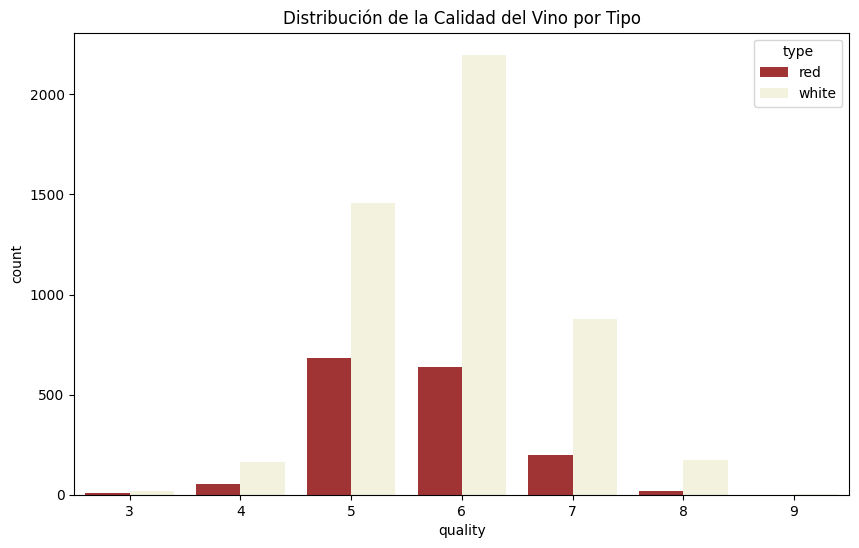

In [ ]:
# Distribución de la variable 'quality' por tipo de vino
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='quality', hue='type', palette={'red': '#B22222', 'white': '#F5F5DC'})
plt.title('Distribución de la Calidad del Vino por Tipo')
plt.show()

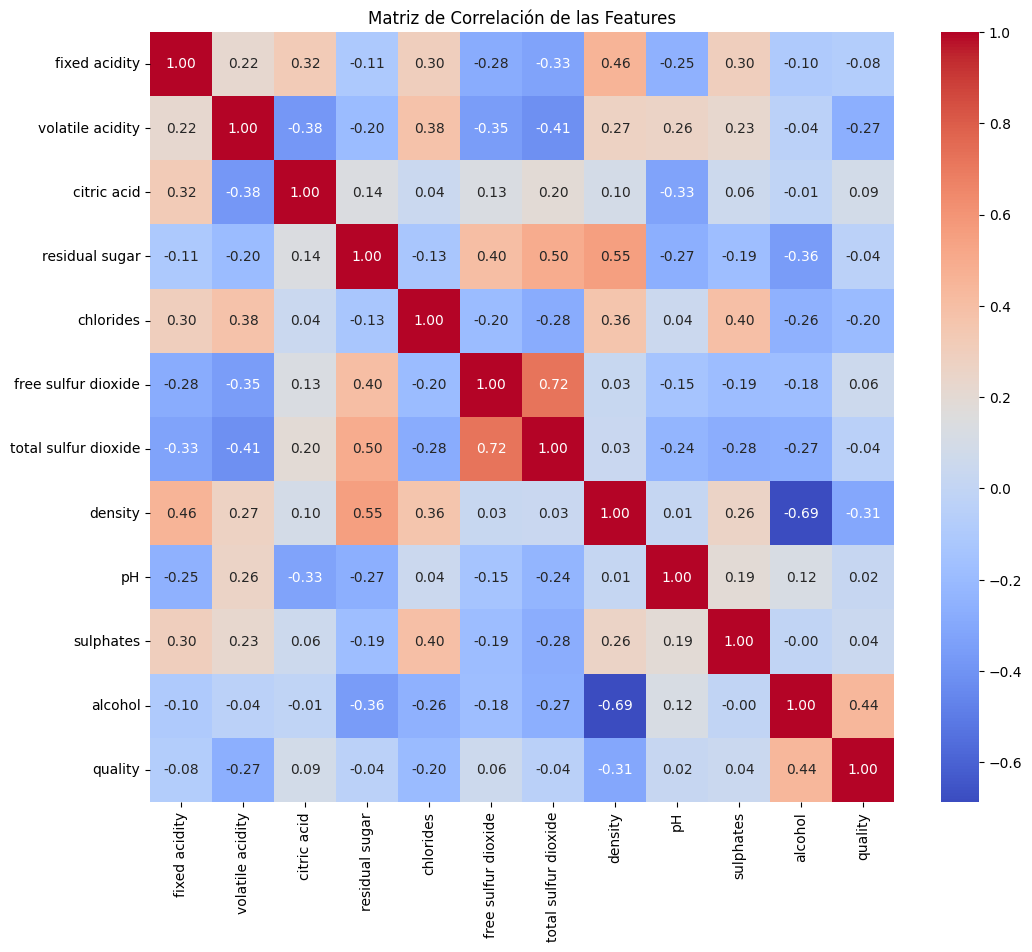

In [ ]:
# Matriz de correlación de las variables fisicoquímicas
plt.figure(figsize=(12, 10))
# Excluimos la columna 'type' porque no es numérica
correlation_matrix = df.drop('type', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de las Features')
plt.show()

### **(A COMPLETAR) Análisis del EDA**
*Observando las visualizaciones y estadísticas, respondan:*
*- ¿Existen valores nulos en el dataset?*
*- ¿Qué variables parecen tener una mayor correlación (positiva o negativa) con la `quality`?*
*- ¿La distribución de la calidad es similar para vinos tintos y blancos? ¿Qué pueden decir de la distribución general de la calidad?*

**Escriban sus respuestas aquí.**

<a name="clasificacion"></a>
## 4. Tarea 1: Clasificación (Predecir Tipo de Vino)
El objetivo aquí es construir un modelo que pueda identificar si un vino es tinto o blanco basándose en sus características fisicoquímicas.

<a name="prep_clasificacion"></a>
### 4.1. Preparación de Datos para Clasificación
Definiremos nuestras variables `X` (features) e `y` (target), y luego dividiremos los datos y los escalaremos.

In [ ]:
# Definición de Features (X) y Target (y)
X_clf = df.drop('type', axis=1)
y_clf = df['type']

# División en Train y Test (estratificada para mantener la proporción de clases)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.25, random_state=42, stratify=y_clf
)

# Escalar las features es crucial para muchos modelos
scaler_clf = StandardScaler()
X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf)
X_test_clf_scaled = scaler_clf.transform(X_test_clf)

print("Forma de X_train escalado:", X_train_clf_scaled.shape)
print("Forma de X_test escalado:", X_test_clf_scaled.shape)

Forma de X_train escalado: (4872, 12)
Forma de X_test escalado: (1625, 12)


<a name="modelos_base_clasificacion"></a>
### 4.2. Modelos Base de Clasificación
Comenzamos con modelos simples para tener una línea de base (baseline) de rendimiento.

In [ ]:
# --- Modelo 1: Regresión Logística ---
print("--- Entrenando Regresión Logística ---")
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_clf_scaled, y_train_clf)
y_pred_log = log_reg.predict(X_test_clf_scaled)
print(classification_report(y_test_clf, y_pred_log))

# --- Modelo 2: Árbol de Decisión ---
print("\n--- Entrenando Árbol de Decisión ---")
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_clf_scaled, y_train_clf)
y_pred_tree = tree_clf.predict(X_test_clf_scaled)
print(classification_report(y_test_clf, y_pred_tree))

--- Entrenando Regresión Logística ---
              precision    recall  f1-score   support

         red       0.98      0.98      0.98       400
       white       0.99      0.99      0.99      1225

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625


--- Entrenando Árbol de Decisión ---
              precision    recall  f1-score   support

         red       0.96      0.98      0.97       400
       white       1.00      0.99      0.99      1225

    accuracy                           0.99      1625
   macro avg       0.98      0.99      0.98      1625
weighted avg       0.99      0.99      0.99      1625



<a name="completar_clasificacion"></a>
### 4.3. (A COMPLETAR) Modelos Avanzados y Optimización
Ahora es su turno. Deben entrenar un `RandomForestClassifier` y un `XGBClassifier`. Para ambos, utilicen `GridSearchCV` para encontrar los mejores hiperparámetros.

<a name="conclusion_clasificacion"></a>
### 4.4. (A COMPLETAR) Tabla de Resultados y Conclusión de Clasificación
Completen la siguiente tabla con los resultados obtenidos y escriban una conclusión clara.

Deberán completar la siguiente tabla:

| Modelo | Accuracy | F1-Score (weighted avg) | Mejores Hiperparámetros (GridSearch) |
| :--- | :--- | :--- | :--- |
| Regresión Logística |...| ...| N/A |
| Árbol de Decisión   |...| ...| N/A |
| Random Forest       | ...    | ...    | {'n_estimators': ..., 'max_depth': ...} |
| XGBoost             | ...    | ...    | {'n_estimators': ..., 'learning_rate': ...} |

---

### Conclusión de la Tarea de Clasificación

**Escriban su conclusión aquí.**
*Basándose en las métricas, ¿qué modelo es el mejor para esta tarea? ¿Por qué? Consideren no solo la performance (Accuracy/F1-score) sino también otros factores como el tiempo de entrenamiento o la interpretabilidad.*

<a name="regresion"></a>
## 5. Tarea 2: Regresión (Predecir Calidad del Vino)
Ahora, el objetivo es predecir la puntuación de `quality` del vino.

<a name="prep_regresion"></a>
### 5.1. Preparación de Datos para Regresión

In [ ]:
# Definición de Features (X) y Target (y)
# Usaremos las mismas features, pero sin 'type' y el target ahora es 'quality'
X_reg = df.drop(['type', 'quality'], axis=1)
y_reg = df['quality']

# División en Train y Test
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.25, random_state=42
)

# Escalamiento de datos
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

<a name="modelo_base_regresion"></a>
### 5.2. Modelo Base de Regresión

In [ ]:
# --- Modelo 1: Regresión Lineal ---
print("--- Entrenando Regresión Lineal ---")
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_lin = lin_reg.predict(X_test_reg_scaled)

mae_lin = mean_absolute_error(y_test_reg, y_pred_lin)
r2_lin = r2_score(y_test_reg, y_pred_lin)

print(f"MAE Regresión Lineal: {mae_lin:.4f}")
print(f"R² Score Regresión Lineal: {r2_lin:.4f}")

--- Entrenando Regresión Lineal ---
MAE Regresión Lineal: 0.5703
R² Score Regresión Lineal: 0.2589


In [ ]:
# --- Modelo 2: Árbol de Decisión para Regresión ---
print("\n--- Entrenando Árbol de Decisión (Regresión) ---")
tree_reg = DecisionTreeRegressor(max_depth = 3, random_state=42)
tree_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_tree_reg = tree_reg.predict(X_test_reg_scaled)

mae_tree_reg = mean_absolute_error(y_test_reg, y_pred_tree_reg)
r2_tree_reg = r2_score(y_test_reg, y_pred_tree_reg)

print(f"MAE Árbol de Decisión: {mae_tree_reg:.4f}")
print(f"R² Score Árbol de Decisión: {r2_tree_reg:.4f}")


--- Entrenando Árbol de Decisión (Regresión) ---
MAE Árbol de Decisión: 0.5961
R² Score Árbol de Decisión: 0.2444


In [ ]:
# --- Modelo 3: RandomForest para Regresión ---
print("\n--- Entrenando Random Forest (Regresión) ---")
rf_reg = RandomForestRegressor(max_depth = 3, random_state=42)
rf_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_rf_reg = rf_reg.predict(X_test_reg_scaled)

mae_rf_reg = mean_absolute_error(y_test_reg, y_pred_rf_reg)
r2_rf_reg = r2_score(y_test_reg, y_pred_rf_reg)

print(f"MAE Random Forest: {mae_rf_reg:.4f}")
print(f"R² Score Random Forest: {r2_rf_reg:.4f}")


--- Entrenando Random Forest (Regresión) ---
MAE Random Forest: 0.5799
R² Score Random Forest: 0.2659


<a name="completar_regresion"></a>
### 5.3. (A COMPLETAR) Modelos Avanzados y Optimización
Al igual que en la tarea de clasificación, deben implementar y optimizar los modelos `RandomForestRegressor` y `XGBRegressor`.

Deberán completar la siguiente tabla:

| Modelo | MAE (Mean Absolute Error) | R² Score | Mejores Hiperparámetros (GridSearch) |
| :--- | :--- | :--- | :--- |
| Regresión Lineal | ...| ...| N/A |
| RandomForest Regressor| ...    | ...    | {...} |
| XGBoost Regressor     | ...    | ...    | {...} |

---

### Gráfico de Dispersión: Valores Reales vs. Predichos
*Generen aquí un scatter plot con los valores de `y_test_reg` en el eje X y las predicciones de su **mejor modelo** en el eje Y. Añadan una línea diagonal de referencia para visualizar qué tan buenas son las predicciones.*

### Conclusión de la Tarea de Regresión

**Escriban su conclusión aquí.**
*¿Qué modelo tuvo el mejor rendimiento? ¿Qué significan los valores de MAE y R² que obtuvieron? ¿La predicción de la calidad es una tarea fácil o difícil para estos modelos? Justifiquen su respuesta basándose en las métricas y el gráfico.*

<a name="final"></a>
## 6. (A COMPLETAR) Conclusiones Finales del Proyecto

En esta sección final, deben resumir los hallazgos de todo el proyecto.
* ¿Qué tarea fue más "fácil" para los modelos: clasificar el tipo de vino o predecir su calidad? ¿Por qué creen que fue así?
* ¿Qué importancia tuvo el preprocesamiento (escalado de datos)?
* ¿Valió la pena utilizar `GridSearchCV`? ¿Mejoró significativamente el rendimiento de los modelos base?
* Si tuvieran que presentarle una solución a la bodega, ¿qué modelos recomendarían para cada tarea y por qué?